## Support Vector Machines:

Support vector machines focus only on the points that are the most difficult to tell apart, whereas other classifiers pay attention to all of the points. 

The intuition behind the support vector machine approach is that if a classifier is good at the most challenging comparisons (the points in B and A that are closest to each other in Figure 2), then the classifier will be even better at the easy comparisons (comparing points in B and A that are far away from each other). 

**Perceptrons and other classifiers:**

Perceptrons are built by taking one point at a time and adjusting the dividing line accordingly. As soon as all of the points are separated, the perceptron algorithm stops. But it could stop anywhere. Figure 1 shows that there are a bunch of different dividing lines that separate the data. The perceptron's stopping criteria is simple: "separate the points and stop improving the line when you get 100% separation". The perceptron is not explicitly told to find the best separating line. Logistic regression and linear discriminant models are built similarly to perceptrons. 

The best dividing line maximizes the distance between the B points closest to A and the A points closest to B. It's not necessary to look at all of the points to do this. In fact, incorporating feedback from points that are far away can bump the line a little too far, as seen below. 

<p>
        <img src = assets/1.png/>
</p>

**Support Vector Machines:**

Unlike other classifiers, the support vector machine is ***explicitly*** told to find the best separating line. How? The support vector machine searches for the closest points (Figure 2), which it calls the "support vectors" (the name "support vector machine" is due to the fact that points are like vectors and that the best line "depends on" or is "supported by" the closest points). 

Once it has found the closest points, the SVM draws a line connecting them (see the line labeled 'w' in Figure 2). It draws this connecting line by doing vector subtraction (point A - point B). The support vector machine then declares the best separating line to be the line that bisects -- and is perpendicular to -- the connecting line.  

The support vector machine is better because when you get a new sample (new points), you will have already made a line that keeps B and A as far away from each other as possible, and so it is less likely that one will spillover across the line into the other's territory. 

<p>
        <img src = assets/2.png/>
</p>

The paper called *[Duality and Geometry in SVM Classifiers](http://www.robots.ox.ac.uk/~cvrg/bennett00duality.pdf)* finally helped me see the light; that's where I got the images from. 


## Mathematical overview of how SVM's are trained and used:


## Notations ##

In the following, scalars are denoted with italic lowercases (e.g., $y,\, b$), vectors with bold lowercases (e.g., $\mathbf{w},\, \mathbf{x}$), and matrices with italic uppercases (e.g., $W$). $\mathbf{w^T}$ is the transpose of $\mathbf{w}$, and $\|\mathbf{w}\| = \mathbf{w}^T\mathbf{w}$.

Let:

- $\mathbf{x}$ be a feature vector (i.e., the input of the SVM). $\mathbf{x} \in \mathbb{R}^n$, where $n$ is the dimension of the feature vector.
- $y$ be the class (i.e., the output of the SVM). $y \in \{ -1,1\}$, i.e. the classification task is binary. 
- $\mathbf{w}$ and $b$ be the parameters of the SVM: we need to learn them using the training set.
- $(\mathbf{x}^{(i)}, y^{(i)})$ be the $i^ {\text {th}}$ sample in the dataset. Let's assume we have $N$ samples in the training set.

With $n=2$, one can represent the SVM's decision boundaries as follows:

<p>
        <img src = assets/3.png/ width = 400px height = 400px>
</p>

The class $y$ is determined as follows:

$$ 
y^{(i)}=\left\{
                \begin{array}{ll}
                  -1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \leq -1 \\
                  1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \ge 1 \\
                \end{array}
              \right.
$$

which can be more concisely written as $y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1$.

## Goal  ##

The SVM aims at satisfying two requirements:

1. The SVM should maximize the distance between the two decision boundaries. Mathematically, this means we want to maximize the distance between the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = -1$ and the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = 1$. [This distance is equal to $\frac{2}{\|\mathbf{w}\|}$](https://math.stackexchange.com/a/1306417/168764). This means we want to solve $\underset{\mathbf{w}}{\operatorname{max}} \frac{2}{\|\mathbf{w}\|}$. Equivalently we want
$\underset{\mathbf{w}}{\operatorname{min}} \frac{\|\mathbf{w}\|}{2}$.

2. The SVM should also correctly classify all $\mathbf{x}^{(i)}$, which means $y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1, \forall i \in \{1,\dots,N\}$


Which leads us to the following quadratic optimization problem:

$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1 &\forall i \in \{1,\dots,N\}
\end{align}$$

This is the **hard-margin SVM**, as this quadratic optimization problem admits a solution iff the data is linearly separable. 

One can relax the constraints by introducing so-called **slack variables** $\xi^{(i)}$. Note that each sample of the training set has its own slack variable. This gives us the following quadratic optimization problem:


$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}$$

This is the **soft-margin SVM**. $C$ is a hyperparameter called **penalty of the error term**.
 ([What is the influence of C in SVMs with linear kernel?](https://stats.stackexchange.com/q/31066/12359) and [Which search range for determining SVM optimal parameters?](https://stats.stackexchange.com/q/43943/12359)).

One can add even more flexibility by introducing a function $\phi$ that maps the original feature space to a higher dimensional feature space. This allows non-linear decision boundaries. The quadratic optimization problem becomes:

$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}$$


## Optimization  ##


### Solving using the Lagrangian:

<p>
        <img src = assets/4.png/ width = 400px height = 400px>
</p>


<p>
        <img src = assets/5.png/ width = 600px height = 600px>
</p>

### Hence, the optimization depends on the dot product of pairs of examples
--------------------------------------------------------------------------------------------
-------------------
The quadratic optimization problem can be transformed into another optimization problem named the [**Lagrangian dual problem**](https://en.wikipedia.org/w/index.php?title=Duality_(optimization)&oldid=755311099#Convex_problems) (the previous problem is called the **primal**):

$$\begin{align}
\max_{\mathbf{\alpha}}  \quad &\min_{\mathbf{w},b}  \frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \alpha^{(i)} \left(1-\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b)\right), \\
s.t. \quad&0 \leq  \alpha^{(i)} \leq C, &\forall i \in \{1,\dots,N\} 
\end{align}$$

This optimization problem can be simplified (by setting some gradients to $0$) to:

$$\begin{align}
\max_{\mathbf{\alpha}}  \quad & \sum_{i=1}^{N} \alpha^{(i)} - \sum_{i=1}^{N}\sum_{j=1}^{N}  \left( y^{(i)}\alpha^{(i)}\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right) y^{(j)}\alpha^{(j)} \right), \\
s.t. \quad&0 \leq  \alpha^{(i)} \leq C, &\forall i \in \{1,\dots,N\}  
\end{align}$$

$\mathbf{w}$ doesn't appear as $\mathbf{w}=\sum_{i =1}^{N}\alpha^{(i)}y^{(i)}\phi\left(x^{(i)}\right)$ (as stated by the [representer theorem](https://en.wikipedia.org/wiki/Representer_theorem)).

We therefore learn the $\alpha^{(i)}$ using the $(\mathbf{x}^{(i)}, y^{(i)})$ of the training set.

(FYI: [Why bother with the dual problem when fitting SVM?](https://stats.stackexchange.com/q/19181/12359) short answer: faster computation + allows to use the kernel trick, though there exist some good methods to train SVM in the primal e.g. see  {1})

## Making a prediction  ##

Once the $\alpha^{(i)}$ are learned, one can predict the class of a new sample with the feature vector $\mathbf{x}^{\text {test}}$ as follows:

\begin{align*}
y^{\text {test}}&=\text {sign}\left(\mathbf{w^T}\phi\left(\mathbf{x}^{\text {test}}\right)+b\right) \\
&= \text {sign}\left(\sum_{i =1}^{N}\alpha^{(i)}y^{(i)}\phi\left(x^{(i)}\right)^T\phi\left(\mathbf{x}^{\text {test}}\right)+b \right)
\end{align*}

The summation $\sum_{i =1}^{N}$ could seem overwhelming, since it means one has to sum over all the training samples, but the vast majority of $\alpha^{(i)}$ are $0$ (see [Why are the Lagrange multipliers sparse for SVMs?](https://stats.stackexchange.com/q/54976/12359)) so in practice it isn't an issue. (note that [one can construct special cases where all $\alpha^{{(i)}} > 0$](https://stats.stackexchange.com/q/110598/12359).) $\alpha^{{(i)}}=0$ iff $x^{{(i)}}$ is a **support vector**. The illustration above has 3 support vectors.

# Some comments on Duality and KTT conditions
### Primal problem

Picking up from @Antoni's post in between equations $(4)$ and $(5)$, recall that our original, or **primal**, optimization problem is of the form: 


\begin{aligned}
	\min_{w, b} f(w,b) & = \min_{w, b}  \  \frac{1}{2} ||w||^2
	\\
	s.t. \ \  g_i(w,b) &= - y^{(i)} (w^T x^{(i)} + b) + 1 = 0 
\end{aligned}


### Lagrange method
The method of Lagrange multipliers allows us to turn a constrained optimization problem into an unconstrained one of the form:

$$\mathcal{L}(w, b, \alpha) =   \frac{1}{2} ||w||^2 - \sum_i^m \alpha_i [y^{(i)} (w^T x^{(i)} + b) - 1]$$

Where  $\mathcal{L}(w, b, \alpha)$ is called the **Lagrangian** and $\alpha_i$ are called the **Lagrangian multipliers**.  

Our **primal** optimization problem with the Lagrangian becomes the following: (note that the use of $min$, $max$ is not the most rigorous as we should also be using $\inf$ and $\sup$ here...)

$$ \min_{w,b} \left( \max_\alpha \mathcal{L}(w, b, \alpha)\right)$$

### Dual problem
What @Antoni and Prof. Patrick Winston have done in their derivation is assume that the optimization function and the constraints meet some technical conditions such that we can do the following: 

$$ \min_{w,b} \left( \max_\alpha \mathcal{L}(w, b, \alpha)\right) =   \max_\alpha \left( \min_{w,b} \mathcal{L}(w, b, \alpha)\right)$$

This allows us to take the partial derivatives of $\mathcal{L}(w, b, \alpha)$ with respect to $w$ and $b$, equate to zero and then plug the results back into the original equation of the Lagrangian, hence generating an equivalent **dual** optimization problem of the form


\begin{aligned}
	&\max_{\alpha} \min_{w,b} \mathcal{L}(w,b,\alpha)
	\\
	& \max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}> 
	\\
	& s.t. \ \alpha_i \geq 0 
	\\
	& s.t. \ \sum_i^m \alpha_i y^{(i)} = 0	
\end{aligned}
 
### Duality and KTT
Without going into excessive mathematical technicalities, these conditions are a combination of the Duality and the Karush Kuhn Tucker (KTT) conditions and allow us to solve the **dual** problem instead of the **primal** one, while ensuring that the optimal solution is the same. In our case the conditions are the following: 

- The primal objective and inequality constraint functions must be convex
- The equality constraint function must be affine
- The constraints must be strictly feasible


Then there exists $w^*, \alpha^*$ which are solutions to the primal and dual problems. Moreover, the parameters $w^*, \alpha^*$ satisfy the KTT conditions below:

 
\begin{aligned}
	&\frac{\partial}{\partial w_i}  \mathcal{L}(w^*, \alpha^*, \beta^*) = 0 &(A)
	\\
	&\frac{\partial}{\partial \beta_i}  \mathcal{L}(w^*, \alpha^*, \beta^*) = 0 &(B)
	\\
	&\alpha_i^* g_i(w^*) = 0 &(C)
	\\
	&g_i(w^*) \leq 0  &(D)
	\\
	&\alpha_i^* \geq 0 &(E)
\end{aligned}


Moreover, if some $w^*, \alpha^*$ satisfy the KTT solutions then they are also solution to the primal and dual problem. 



Equation $(C)$ above is of particular importance and is called the *dual complementarity condition*. It implies that if $\alpha_i^* > 0$ then $g_i(w^*) = 0$ which means that the constraint $g_i(w) \leq 0$ is active, i.e. it holds with equality rather than inequality. This is the explanation behind equation $(2)$ in Antoni's derivation where the inequality constraint is turned into an equality constraint. 

### A intuitive but informal diagram

<p>
        <img src = assets/6.png/>
</p>

----------
---------
## Kernel trick  ##

One can observe that the optimization problem uses the $\phi\left(\mathbf{x}^{(i)}\right)$ only in the inner product $\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right)$. The function that maps $\left(\mathbf{x}^{(i)},\mathbf{x}^{(j)}\right)$ to the inner product $\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right)$ is [called](https://stats.stackexchange.com/a/226196/12359) a **kernel**, a.k.a. kernel function, often denoted by $k$.

One can choose $k$ so that the inner product is efficient to compute. This allows to use a potentially high feature space at a low computational cost. That is called the [**kernel trick**](https://en.wikipedia.org/w/index.php?title=Kernel_method&oldid=747269865#Mathematics:_the_kernel_trick). For a kernel function to be *valid*, i.e. usable with the kernel trick, it should satisfy [two key properties](https://stats.stackexchange.com/q/48506/12359). There exist [many kernel functions to choose from](https://stats.stackexchange.com/q/18030/12359). As a side note, the kernel trick [may be applied to other machine learning models](https://stats.stackexchange.com/q/2167/12359), in which case they are referred as [*kernelized*](https://scholar.google.com/scholar?q=kernelized+&hl=en&as_sdt=0,22).

## Going further  ##

Some interesting QAs on SVMs:

- [Best way to perform multiclass SVM](https://stats.stackexchange.com/q/21465/12359)
- [Support vector machines and regression](https://stats.stackexchange.com/q/13194/12359)
- [Understanding the different formulations for SVM](https://stats.stackexchange.com/q/157827/12359)
- [What's the difference between $\ell_1$-SVM, $\ell_2$-SVM and LS-SVM loss functions?](https://stats.stackexchange.com/q/255486/12359)
- To deal with an unbalanced dataset:
 - [Best way to handle unbalanced multiclass dataset with SVM](https://stats.stackexchange.com/q/20948/12359)
 - [A priori selection of SVM class weights](https://stats.stackexchange.com/a/24969/12359)
- [How does one interpret SVM feature weights?](https://stats.stackexchange.com/q/39243/12359)
- [Interpretating the C value in a linear SVM](https://stats.stackexchange.com/q/108639/12359)
- [Generalization bounds on SVM](https://stats.stackexchange.com/q/259788/12359)
- [General formula for the VC Dimension of a SVM](https://stats.stackexchange.com/q/255301/12359)
- [What does the "machine" in "support vector machine" and "restricted Boltzmann machine" mean?](https://stats.stackexchange.com/q/261041/12359)
- [How are SVMs = Template Matching?](https://stats.stackexchange.com/q/263587/12359)
- [Single layer NeuralNetwork with ReLU activation equal to SVM?](https://stats.stackexchange.com/q/190883/12359)
- [Comparing SVM and logistic regression](https://stats.stackexchange.com/q/95340/12359)

Other links:

-  [Least squares support vector machine](https://en.wikipedia.org/wiki/Least_squares_support_vector_machine)

----------
References:

- {1} Chapelle, Olivier. "Training a support vector machine in the primal." Neural computation 19, no. 5 (2007): 1155-1178. https://scholar.google.com/scholar?cluster=469291847682573606&hl=en&as_sdt=0,22 ; http://www.chapelle.cc/olivier/pub/neco07.pdf


## Code sample 1: SVM using cvxopt

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
from cvxopt import matrix, solvers

 x: (100, 2) and y: (100,)


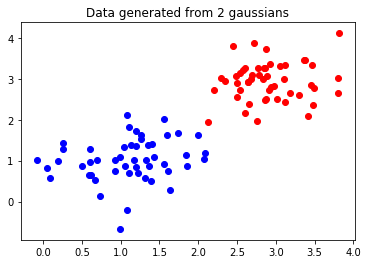

In [29]:
# Generating the data

DIM = 2
COLORS = ['red', 'blue']

# 2-D mean of ones
M1 = np.ones(DIM, )

# 2-D mean of threes
M2 = 3*np.ones(DIM, )

# 2-D covariance of 0.3
C1 = np.diag(0.3*np.ones(DIM, ))

# 2-D covariance of 0.2
C2 = np.diag(0.2*np.ones(DIM, ))

def generate_gaussian(m , c, num):
    return np.random.multivariate_normal(m, c, num)

def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
        plt.title('Data generated from 2 gaussians')
    plt.show()

NUM = 50

if __name__ == '__main__':
    # generate 50 points from gaussian 1
    x1 = generate_gaussian(M1, C1, NUM)
    
    # labels
    y1 = np.ones(x1.shape[0], )
    
    # generate 50 points from gaussian 2
    x2 = generate_gaussian(M2, C2, NUM)
    y2 = -np.ones(x2.shape[0], )
    
    # join
    x = np.concatenate((x1, x2), axis = 0)
    y = np.concatenate((y1, y2), axis = 0)
    
    print(f" x: {x.shape} and y: {y.shape}")
    
    plot_data_with_labels(x, y)
    
    with open('gaussiandata.pickle', 'wb') as f:
        pickle.dump((x,y), f)

### Fitting an SVM

<p>
        <img src = assets/7.png/ width = 1800px height = 1800px>
</p>
    

In [30]:
def fit(x, y):
    NUM = x.shape[0]
    DIM = x.shape[1]
    # we'll solve the dual
    # obtain the kernel
    K = y[:, None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1)))
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    return alphas

Note that `sol['x']` contains the x that was part of cvxopt interface - it is our α. Now if you are familiar with SVMs, you will know that only a few of the alphas should be non-zero and they will be our support vectors. Using these alphas, we can obtain w and b from our original SVM problem. Once we do that, they will together define the decision boundary. w is equal to Σiαiyixi and b is equal to yi−wTxi for any i such that αi>0. So we do the following to obtain them.

In [31]:
with open('gaussiandata.pickle', 'rb') as f:
    data = pickle.load(f)

x, y = data[0], data[1]

# fit svm classifier

alphas = fit(x, y)

# get weights
w = np.sum(alphas * y[:, None] * x, axis = 0)

# get bias
cond = (alphas > 1e-4).reshape(-1)
b = y[cond] - np.dot(x[cond], w)
bias = b[0]

Finally, we’ll plot the decision boundary for good visualizaiton. Since it will be a line in this case, we need to obtain the slope and intercept of the line from the weights and bias. 

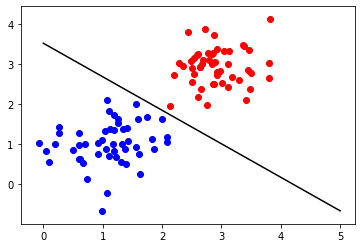

In [33]:
def plot_data_with_labels(x, y, ax):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])

def plot_separator(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(0, 6)
    ax.plot(x, x * slope + intercept, 'k-')

# # normalize
# norm = np.linalg.norm(w)
# w, bias = w / norm, bias / norm

fig, ax = plt.subplots()
plot_separator(ax, w, bias)
plot_data_with_labels(x, y, ax)
plt.show()

## Code sample 2: SVM using cvxopt

<p>
    <img src = assets/9.png>
</p>

<p>
    <img src = assets/10.png>
</p>

<p>
    <img src = assets/11.png>
</p>

<p>
    <img src = assets/12.png>
</p>

<p>
    <img src = assets/13.png>
</p>

<p>
    <img src = assets/14.png>
</p>

**We introduce an additional variable stickily for convenience. The variable y will be equal to positive one for all positive samples and negative one for all negative samples.**

<p>
    <img src = assets/15.png>
</p>

<p>
    <img src = assets/16.png>
</p>

**Next, we need to address the process by which we go about maximizing the margin. To get an equation for the width of the margin, we subtract the first support vector from the one below it and the multiply the result by the unit vector of w which is always perpendicular to the decision boundary.**

<p>
    <img src = assets/17.png>
</p>

**Using the constraints from above and a bit of algebra, we get the following.**

<p>
    <img src = assets/18.png>
</p>


**Therefore, in order to select the optimal decision boundary, we must maximize the equation we just computed.**

<p>
    <img src = assets/19.png>
</p>

**Now, in most machine learning algorithms, we’d use something like gradient descent to minimize said function, however, for support vector machines, we use the Lagrangian. In essence, using Lagrangian, we can solve for the global minimum like we’d do in high school level calculus (i.e. take the derivative of the function and make it equal to zero). The Lagrange tells us to subtract the cost function by the summation over all the constraints where each of those constraints will be multiplied by some constant alpha (normally written as lambda for the Lagrangian).**

<p>
    <img src = assets/4.png>
</p>

**Then, we perform some more algebra, plugging the equations we found in the previous step back into the original equation.**

<p>
    <img src = assets/5.png>
</p>


**Before we can proceed any further, we need to express the equation in terms of matrices instead of summations. The reason being, the** `qp` **function from the CVXOPT library, which we’ll use to solve the Lagrangian, accepts very specific arguments. Thus, we need to go from:**

<p>
    <img src = assets/20.png>
</p>

<p>
    <img src = assets/21.png>
</p>

<p>
    <img src = assets/22.png>
</p>

<p>
    <img src = assets/23.png>
</p>

<p>
    <img src = assets/24.png>
</p>

In [2]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

/home/abhishek/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
class SVM:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # P = X^T.X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
        
        P = cvxopt.matrix(np.outer(y,y) * K)
        
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        
        # A = y^T
        A = cvxopt.matrix(y, (1, n_samples))
        
        # b=0
        b = cvxopt.matrix(0.0)
        
        # G = -1(NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        
        # h = 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
        
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        
        # Lagrange multipliers
        a = np.ravel(solution['x'])
        
        # Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        
        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)
        
        # Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]

    def project(self, X):
        return np.dot(X, self.w) + self.b
    
    
    def predict(self, X):
        return np.sign(self.project(X))

To keep things simple, we’ll use the scikit-learn library to generate linearly separable data. We label the negative samples as -1 instead of 0. cvxopt expects the data to be in a specific format which is why we take an intermediate step.

In [19]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1

tmp = np.ones(len(X))
y = tmp * y

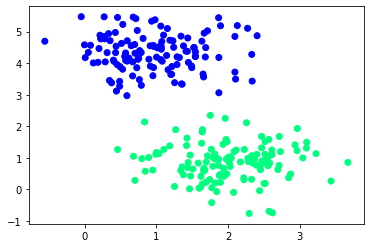

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
svm = SVM()
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  1e-15  8e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  1e-15  6e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  2e-15  7e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  1e-17  5e-15
Optimal solution found.


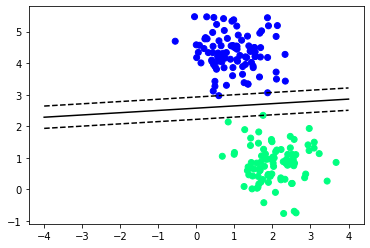

In [23]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

In [24]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]])

## Code sample 3: SVM using numpy at best

<p>
        <img src = assets/25.jpeg>
</p>

The **SVM (Support Vector Machine)** is a supervised machine learning algorithm typically used for binary classification problems. It’s trained by feeding a dataset with labeled examples (xᵢ, yᵢ). For instance, if your examples are email messages and your problem is spam detection, then:

- An example email message xᵢ is defined as an n-dimensional feature vector that can be plotted on n-dimensional space.
- The feature vector, as the name explains, contains features (eg. word count, link count, etc.) of your email message in numerical form
- Each feature vector is labeled with a class yᵢ
- The class yᵢ can either be a +ve or -ve (eg. spam=1, not-spam=-1)

Using this dataset the algorithm finds a hyperplane (or decision boundary) which should ideally have the following properties:

- It creates separation between examples of two classes with a maximum margin
- Its equation (w.x + b = 0) yields a value ≥ 1 for examples from+ve class and ≤-1 for examples from -ve class

How does it find this hyperplane? By finding the optimal values w* (weights/normal) and b* (intercept) which define this hyperplane. The optimal values are found by minimizing a cost function. Once the algorithm identifies these optimal values, the SVM model f(x) is then defined as shown below:

    f(x) = sign(w*.x + b*)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm  # for finding the p-value

from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

In [30]:
# Reading the data

# The features in the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
# They describe the characteristics of the cell nuclei present in the image. Based on these features we will 
# train our SVM model to detect if the mass is benign B (generally harmless) or malignant M (cancerous).

data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [58]:
def init():
    data = pd.read_csv('data.csv')
    
    # SVM accepts only numerical values so we transform the categories M and B into -1 and 1
    
    diagnosis_map = {'M':1, 'B':-1}
    
    data['diagnosis'] = data['diagnosis'].map(diagnosis_map)
    
    # Dropping last column and first column
    data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
    
    X = data.iloc[:, 1:] # iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
    Y = data.loc[:, 'diagnosis'] # loc gets rows (or columns) with particular labels from the index.
    
    remove_correlated_features(X)
    remove_less_significant_features(X, Y)
    
    # normalize the features using MinMaxScalar from sklearn.preprocessing
    X_normalized = MinMaxScaler().fit_transform(X.values)
    X = pd.DataFrame(X_normalized)
    
    # first insert 1 in every row for intercept b
    X.insert(loc=len(X.columns), column='intercept', value=1)
    
    print("Splitting dataset into train and test sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # train the model
    print("Started Training")
    
    W = sgd(X_train.to_numpy(), y_train.to_numpy())
    
    print("Training finished.")
    print("Weights are: {}".format(W))
    
    # testing the model on test set
    y_test_predicted = np.array([])
    for i in range(X_test.shape[0]):
        yp = np.sign(np.dot(W, X_test.to_numpy()[i])) #model
        y_test_predicted = np.append(y_test_predicted, yp)
        
    print("Accuracy on test dataset: {}".format(accuracy_score(y_test.to_numpy(), y_test_predicted)))
    print("Recall on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))
    print("Precision on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))

### Cost Function

One of the building blocks of every machine learning algorithm, it’s the function we try to minimize or maximize to achieve our objective.

**What’s our objective in SVM?** Our objective is to find a hyperplane that separates +ve and -ve examples with the largest margin while keeping the misclassification as low as possible (see Figure 3).

**How do we achieve this objective?** We will minimize the cost/objective function shown below:

<p>
        <img src = assets/26.png>
</p>

You might have seen another version of a cost function that looks like this:

<p>
        <img src = assets/27.png>
</p>

In this cost function, λ is essentially equal to 1/C and has the opposite effect i.e larger λ gives a wider margin and vice versa. We can use any of the above cost functions keeping in mind what each regularization parameter (C and λ) does and then tuning them accordingly. Let’s see how can we calculate the total cost as given in (1) and then we will move on to its gradient which will be used in the training phase to minimize it:

In [59]:
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

As you might have noticed that the intercept term b is missing. That’s because we have pushed it into the weight vector like this:

<p>
        <img src = assets/28.png>
</p>


### That’s why we added an extra column with all 1s before splitting our dataset.

### Gradient of Cost Function

<p>
        <img src = assets/29.png>
</p>


In [93]:
#### ERROR: https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2

def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array

    distance = 1 - (Y_batch * np.dot(X_batch, W))
#     print(distance.shape, Y_batch.shape, X_batch.shape, W.shape)
    dw = np.zeros(len(W))

#     for ind, d in enumerate(distance):
#         if max(0, d) == 0:
#             di = W
#         else:
#             di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
#         dw += di
#     dw = dw/len(Y_batch)  # average

    di = W - (regularization_strength * Y_batch * X_batch)
    dw += di
    return dw

### Training model using SGD

Why do we minimize the cost function? Because the cost function is essentially a measure of how bad our model is doing at achieving the objective. If you look closely at J(w), to find it’s minimum, we have to:

1. Minimize ∣∣w∣∣² which maximizes margin (2/∣∣w∣∣)
2. Minimize the sum of hinge loss which minimizes misclassifications.

**How do we minimize it?**

Well, there are multiple ways but the one we will use is called Stochastic Gradient Descent or SGD.

<p>
        <img src = assets/30.png height = 400px width = 400px>
</p>

**Gradient descent algorithm works as follows**

- Find the gradient of cost function i.e. ∇J(w’)
- Move opposite to the gradient by a certain rate i.e. w’ = w’ — ∝(∇J(w’))
- Repeat step 1–3 until convergence i.e we found w’ where J(w) is smallest

Why does it move opposite to the direction of the gradient? Because gradient is the direction of the fastest increase of the function. We need to move opposite to that direction to minimize our function J(w). Hence, the word “descent” in Gradient Descent is used.

In typical gradient descent (a.k.a vanilla gradient descent) the step 1 above is calculated using all the examples (1…N). In SGD, however, only 1 example is used at a time.

In [91]:
def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

In [92]:
# After training the model using SGD we finally got the optimal weights w* which defines the best 
# possible hyperplane separating two classes. Let’s test our model using this hyperplane. 

# Calling init
regularization_strength = 10000
learning_rate = 0.000001
init()

Splitting dataset into train and test sets...
Started Training
Epoch is: 1 and Cost is: 6177.387545790943
Epoch is: 2 and Cost is: 8508.5742014718
Epoch is: 4 and Cost is: 13366.440117739556
Epoch is: 8 and Cost is: 23129.48617693818
Epoch is: 16 and Cost is: 42741.3988732552
Epoch is: 32 and Cost is: 82271.39690213982
Epoch is: 64 and Cost is: 162350.18245808998
Epoch is: 128 and Cost is: 326215.83550679113
Epoch is: 256 and Cost is: 666380.748971567
Epoch is: 512 and Cost is: 1380234.3772538519
Epoch is: 1024 and Cost is: 2844391.8199767894
Epoch is: 2048 and Cost is: 5490365.834151834
Epoch is: 4096 and Cost is: 8880091.359998146
Epoch is: 4999 and Cost is: 9714734.506602418
Training finished.
Weights are: [  261.45950729  -219.19511982   298.59202834   406.50137946
  -489.56947106   227.03355442   621.24824322   721.16116254
  -456.46490048  -640.58892429   236.94476789  -432.88724527
   218.87276277   251.72025442  -466.07325606   -97.30138861
   -39.33732165  -127.15359129  -407.

### Feature Selection With Correlation & P-values

Feature selection encompasses statistical techniques that help in filtering irrelevant or redundant features. Correlation & p-values are among these statistical techniques. Using them we will select a subset of relevant and important features from our original set of features

**What is correlation?** Correlation is a degree of linear dependence (or linear relationship) between two variables. Two features are said to be correlated if the values of one feature can be explained by some linear relationship of the second feature. The degree of this relationship is given by the correlation coefficient (or “r”). It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.

**Why do we remove one of the correlated features?** There are multiple reasons but the simplest of them is that correlated features almost have the same effect on the dependent variable. Moreover, correlated features won’t improve our model and would most probably worsen it, therefore we are better off using only one of them. After all, fewer features result in improved learning speed and a simpler model (model with fewer features).

**What are p-values?** In the context of feature selection, p-values help us find the features which are most significant in explaining variation in the dependent variable (y).

A feature with a low p-value has more significance and a feature with a high p-value has less significance in explaining the variation. Usually, we set a Significance Level SL (threshold) and if a feature has a p-value above this level it is discarded.

**Why do we remove features with high p-values?** Because they don’t tell much about the behavior of the dependent variable. So, why keep them and unnecessarily increase the complexity of our model when they are not helping us in predicting the result.

We have two functions named remove_correlated_features() remove_less_significant_features() for removing highly correlated features and less significant features (using p-values and backward elimination) respectively:

In [81]:
def remove_correlated_features(X):
    corr_threshold = 0.9
    corr = X.corr
    drop_columns = np.full(corr.shape[0], False, dtype = bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i, j] >= corr.threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped

In [82]:
def remove_less_significant_features(X, Y):
    sl = 0.05
    regression_ols = None
    columns_dropped = np.array([])
    for itr in range(0, len(X.columns)):
        regression_ols = sm.OLS(Y, X).fit()
        max_col = regression_ols.pvalues.idxmax()
        max_val = regression_ols.pvalues.max()
        if max_val > sl:
            X.drop(max_col, axis='columns', inplace=True)
            columns_dropped = np.append(columns_dropped, [max_col])
        else:
            break
    regression_ols.summary()
    return columns_dropped

### REFERENCES:
- [In depth SVM](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)
- [SVM example](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)
- [SVM python](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)
- [Support Vector Machine: Python implementation using CVXOPT](https://xavierbourretsicotte.github.io/SVM_implementation.html)
- [SVM CVXOPT](http://goelhardik.github.io/2016/11/28/svm-cvxopt/)
- [How does a Support Vector Machine (SVM) work?](https://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work/353605#353605)
- [Help me understand Support Vector Machines](https://stats.stackexchange.com/questions/3947/help-me-understand-support-vector-machines)
- [MIT Prof. Patrick Winston](https://www.youtube.com/watch?v=_PwhiWxHK8o&feature=youtu.be)
- [How can SVM 'find' an infinite feature space where linear separation is always possible?](https://stats.stackexchange.com/questions/80398/how-can-svm-find-an-infinite-feature-space-where-linear-separation-is-always-p/168309#168309)
- [Khan academy Lagrange multiplier](https://www.youtube.com/watch?v=hQ4UNu1P2kw)
- [Support Vector Machine — Using Numpy](https://medium.com/@saishruthi.tn/support-vector-machine-using-numpy-846f83f4183d)
- [Mathematics behind SVM(Support Vector Machine)](https://towardsdatascience.com/mathematics-behind-svm-support-vector-machines-84742ddda0ca)
- [Math behind SVM (Support Vector Machine)](https://medium.com/@ankitnitjsr13/math-behind-support-vector-machine-svm-5e7376d0ee4d)
- [SVM From Scratch — Python](https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2)